# Basic random number generators

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import time
%config InlineBackend.figure_format='retina'

In [22]:
plt.rcParams['text.usetex'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

## Uniform generator

We are going to construct the mixed congruential generator,
$$
m_{i+1}=(am_i+c) mod (M),\quad m\in (0,M-1),
$$
to generate random numbers. 

In [23]:
def uniform(low=0,high=1,seed=456,size=1):
    a,m,c,M=65539,seed,3500,2**16
    rnd=[]
    for i in range(size):
        m=(a*m+c)%M 
        m=m/M
        x=x=(high-low)*m+low 
        rnd.append(x)
    return rnd

Let us test if the distribution is uniform or not.

Text(0, 0.5, 'Pdf')

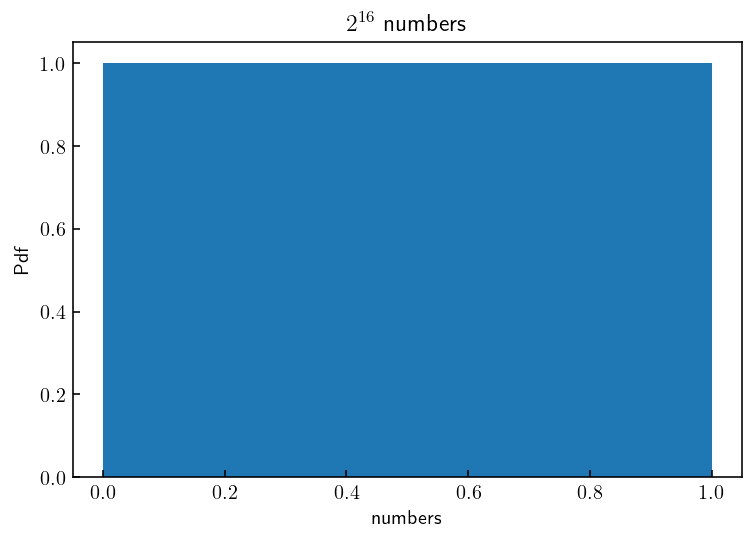

In [24]:
my_gen=uniform(size=2**16)
plt.hist(my_gen,density=True) 
plt.title('$2^{16}$ numbers')
plt.xlabel('numbers')
plt.ylabel('Pdf')

## Random choice

We will now write the random choice generator to select points from above distribution. We use system clock to randomly choose the seed for above generator.

In [26]:
def choice(lst):
    t=time.perf_counter()
    seed=int(10**9*float(str(t-int(t))[0:]))
    s=uniform(low=1,high=2**16,seed=seed,size=1)[0]
    idx=int(s)%len(lst)
    return lst[idx]

Let us test it.

In [28]:
for r in range(7):
    print(choice(np.arange(0,10,1)))

8
1
4
7
1
1
1


## Non-uniform generator

For this method, we will generate the pdf, $f_\hat{x} (x) = C exp( \frac{1}{2}x^2 - x^4 )$.

The random numbers will be generated from,
$$
g(x)=\frac{1}{\sqrt{2\pi}}exp(-\frac{1}{2}x^2),\quad x\in (-\infty ,\infty )
$$
and the acceptance function will be,
$$
h(x)=exp(x^2-x^4).
$$

In [34]:
def maximum(x=np.linspace(-5,5,100)):
    y2=np.exp((x**2) -(x**4))
    return round(y2.max(),3)

In [35]:
maximum()

1.278

The function $h(x)$ has a maximu vlaue $\approx 1.278$, so to keep $h(x)\in(0,1)$, we devide $h(x)$ by this number to bring it in the range $(0,1)$.
$$
h(x)=\frac{exp(x^2-x^4)}{1.278}.
$$

The normalization constant can be determined from the above choice of $g(x)$ and $h(x)$ as following.

Since the given distribution $f_\hat{x} (x) = C exp( \frac{1}{2}x^2 - x^4 )$ was supposed as$f_\hat{x} (x) = C \sqrt{2\pi}g(x)h(x)$. Upon integrating both sides,we get,
$$
\begin{eqnarray}
C\sqrt{2\pi}\int_{-\infty}^\infty g(x)h(x) dx &=&1,
\end{eqnarray}
$$
$$
C=\frac{1}{1.278\sqrt{2\pi}\epsilon},
$$

where,
$$
\epsilon=\int_{-\infty}^\infty exp(x^2 - x^4 ) dx,
$$
can be computed using importance sampling method. 

We now compute the constant $C$ and generate the distribution for $10^6$ Monte Carlo sweeps.

In [43]:
def C(N):
    sum_h=0
    sum_h_square=0
    for i in range(N):
        x=np.random.normal(0,1)
        h=np.exp((x**2)-x**4)
        sum_h=sum_h+h
        sum_h_square=sum_h_square+(h*h)
        
    average_h=sum_h/N
    a=average_h*np.sqrt(2*np.pi)
    c=1/a
    return c

In [52]:
N=10**6
c=C(N)
c

0.4573636032086913

In [53]:
def nonuni(N):
    accept2=[]
    for i in range(10**7):
      x=np.random.normal(0,1)
      h=np.exp((x**2)-(x**4))/(1.278)
      y=np.random.uniform()
      if y<=h:
        accept2.append(x)
    return accept2

In [54]:
acc=nonuni(N)

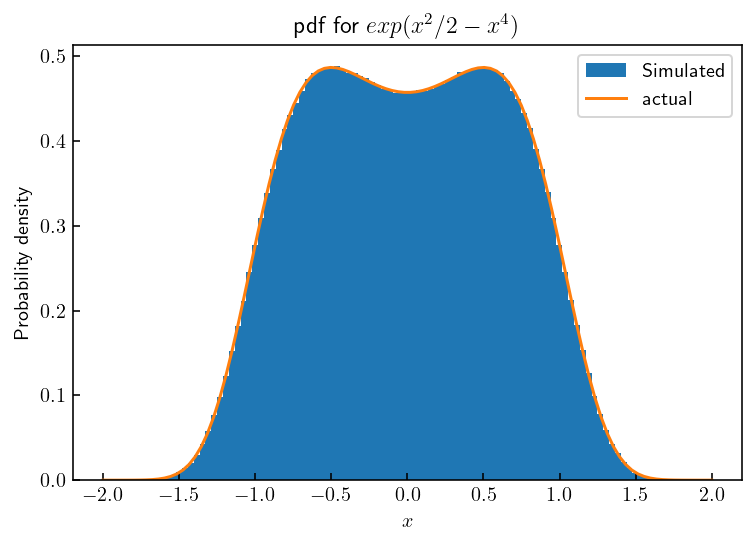

In [55]:
plt.hist(acc,bins=100,density=True,label='Simulated')
plt.title('pdf for $exp(x^2/2-x^4)$')
plt.xlabel('$x$')
plt.ylabel('Probability density')
xx=np.linspace(-2,2,100)
yy=c*np.exp(0.5*xx**2-xx**4)
plt.plot(xx,yy,label="actual")
plt.legend()

***